In [1]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.10.0


In [2]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059402,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582657,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200


In [3]:
# Print the data type of appl_data
print(aapl_data.describe())

              Open         High          Low        Close    Adj Close  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    140.675507   142.321389   139.143536   140.808131   139.213527   
std      33.310018    33.430571    33.179199    33.313857    33.661414   
min      57.020000    57.125000    53.152500    56.092499    54.706993   
25%     123.682503   125.030003   122.157499   123.592501   121.492750   
50%     145.540001   147.264999   144.120003   145.860001   144.116104   
75%     166.302498   168.147503   164.815002   166.214996   164.680264   
max     198.020004   199.619995   197.000000   198.110001   197.857529   

             Volume  
count  1.006000e+03  
mean   9.895211e+07  
std    5.439653e+07  
min    2.404830e+07  
25%    6.407675e+07  
50%    8.467540e+07  
75%    1.155069e+08  
max    4.265100e+08  


In [4]:
# Checking for missing values
aapl_data.isnull().sum()

# Filling missing values, if any
aapl_data = aapl_data.ffill()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [6]:
print(f'length: {len(aapl_data_scaled)}')
print(f'type: {type(aapl_data_scaled)}')
aapl_data_scaled 

length: 1006
type: <class 'numpy.ndarray'>


array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.96507468],
       [0.96810253],
       [0.96070906]])

In [7]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])


In [8]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
print(f'length: {len(X_train)}')
print(f'type: {type(X_train)}')
X_train

length: 756
type: <class 'list'>


[array([0.13375114, 0.1286109 , 0.13278292, 0.13030088, 0.13875052,
        0.15008715, 0.15131936, 0.16299047, 0.15545619, 0.15309733,
        0.15996267, 0.16610632, 0.16230396, 0.16429316, 0.16698649,
        0.16536695, 0.14889013, 0.16427554, 0.17598183, 0.17515447,
        0.14987592, 0.14837961, 0.16631755, 0.17089446, 0.17751333,
        0.16839474, 0.17107045, 0.16765538, 0.18101645, 0.17691481,
        0.17705567, 0.16658159, 0.17471438, 0.16887002, 0.15610751,
        0.12993116, 0.11215165, 0.12019645, 0.08652102, 0.08623935,
        0.13104019, 0.11433452, 0.13795834, 0.12067178, 0.11382401,
        0.07358251, 0.10732832, 0.08988328, 0.04200187, 0.09435458,
        0.0314046 , 0.05015228, 0.03925573, 0.03592868, 0.00857291,
        0.        , 0.03962541, 0.03723134, 0.05997502, 0.04113931]),
 array([0.1286109 , 0.13278292, 0.13030088, 0.13875052, 0.15008715,
        0.15131936, 0.16299047, 0.15545619, 0.15309733, 0.15996267,
        0.16610632, 0.16230396, 0.16429316, 0.

In [10]:
print(f'length: {len(X_test)}')
print(f'type: {type(X_test)}')
X_test

length: 190
type: <class 'list'>


[array([0.48569719, 0.49478058, 0.48534509, 0.51773546, 0.52146738,
        0.5255514 , 0.54498569, 0.54442237, 0.55392818, 0.56223707,
        0.55709689, 0.55751935, 0.57582689, 0.59864102, 0.60863977,
        0.60392206, 0.61870901, 0.63258044, 0.61194923, 0.62103257,
        0.62905975, 0.66701292, 0.69292517, 0.6734205 , 0.69398133,
        0.67475838, 0.6673649 , 0.66835069, 0.68834831, 0.68377134,
        0.69876953, 0.68736252, 0.67919449, 0.650536  , 0.65356385,
        0.65701406, 0.63807282, 0.64659284, 0.64300177, 0.62821482,
        0.63243969, 0.66849155, 0.68820745, 0.67250519, 0.68144767,
        0.66539332, 0.65067685, 0.66454839, 0.67947609, 0.68229271,
        0.70243108, 0.69644586, 0.71334514, 0.72658298, 0.71637299,
        0.72411845, 0.73341313, 0.7195416 , 0.71510549, 0.73707469]),
 array([0.49478058, 0.48534509, 0.51773546, 0.52146738, 0.5255514 ,
        0.54498569, 0.54442237, 0.55392818, 0.56223707, 0.55709689,
        0.55751935, 0.57582689, 0.59864102, 0.

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [12]:
print(X_train.shape)
print(X_train.shape[0])
print(X_train.shape[1])

(756, 60)
756
60


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
print(f'length: {len(X_train)}')
print(f'type: {type(X_train)}')
X_train

length: 756
type: <class 'numpy.ndarray'>


array([[[0.13375114],
        [0.1286109 ],
        [0.13278292],
        ...,
        [0.03723134],
        [0.05997502],
        [0.04113931]],

       [[0.1286109 ],
        [0.13278292],
        [0.13030088],
        ...,
        [0.05997502],
        [0.04113931],
        [0.05358495]],

       [[0.13278292],
        [0.13030088],
        [0.13875052],
        ...,
        [0.04113931],
        [0.05358495],
        [0.05266956]],

       ...,

       [[0.49252734],
        [0.51766508],
        [0.51991827],
        ...,
        [0.71637299],
        [0.72411845],
        [0.73341313]],

       [[0.51766508],
        [0.51991827],
        [0.48569719],
        ...,
        [0.72411845],
        [0.73341313],
        [0.7195416 ]],

       [[0.51991827],
        [0.48569719],
        [0.49478058],
        ...,
        [0.73341313],
        [0.7195416 ],
        [0.71510549]]])

In [16]:
from keras.models import Sequential
from tensorflow.compat.v1.keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Implementing Early Stopping to avoid Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]


In [17]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute_2 (Permute)         (None, 50, 60)            0         
                                                                 
 reshape_2 (Reshape)         (None, 50, 60)            0         
                                                                 
 permute_3 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_3 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten_1 (Flatten)         (None, 3000)             

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/100
25/25 [==============================] - 28s 975ms/step - loss: 0.4271 - val_loss: 0.3926 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 24s 961ms/step - loss: 0.2773 - val_loss: 0.3609 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 24s 951ms/step - loss: 0.2460 - val_loss: 0.3224 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 23s 936ms/step - loss: 0.2242 - val_loss: 0.2924 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 23s 932ms/step - loss: 0.2008 - val_loss: 0.2628 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 23s 932ms/step - loss: 0.1844 - val_loss: 0.2372 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 24s 950ms/step - loss: 0.1682 - val_loss: 0.2304 - lr: 0.0010
Epoch 8/100
25/25 [==============================] - 24s 970ms/step - loss: 0.1500 - val_loss: 0.2032 - lr: 0.0010
Epoch 9/100
25/25 [==============================] - 23s 940ms/step - loss: 0.13

In [19]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)


6/6 [==============================] - 2s 289ms/step - loss: 0.0178
Test Loss:  0.017808925360441208


In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)


6/6 [==============================] - 2s 238ms/step
Mean Absolute Error:  0.13066021644291373
Root Mean Square Error:  0.13345008151272386


In [25]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 457ms/step
Predicted Stock Prices for the next 4 days:  [198.18494, 200.07184, 200.66939, 200.65099]


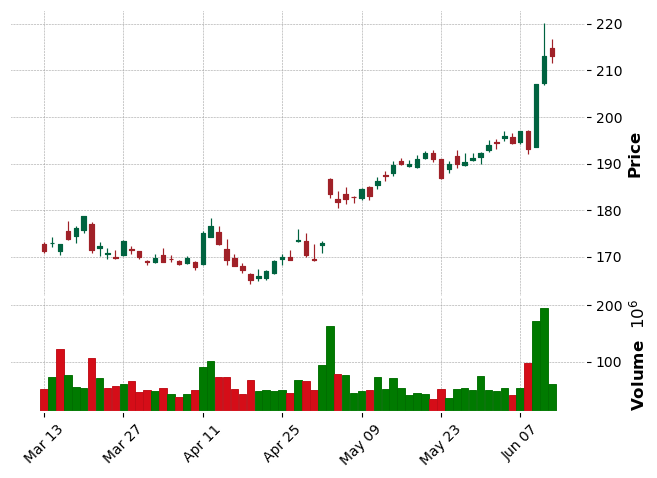

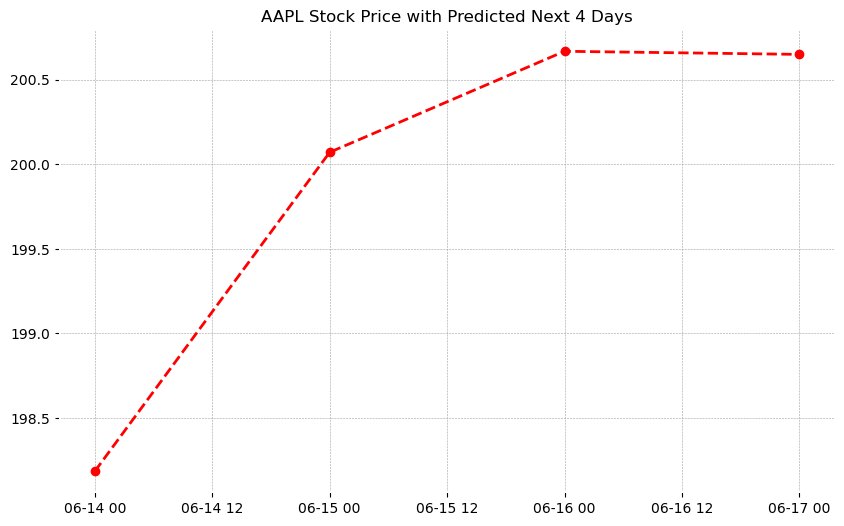

In [27]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("AAPL Stock Price with Predicted Next 4 Days")
plt.show()



[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 541ms/step


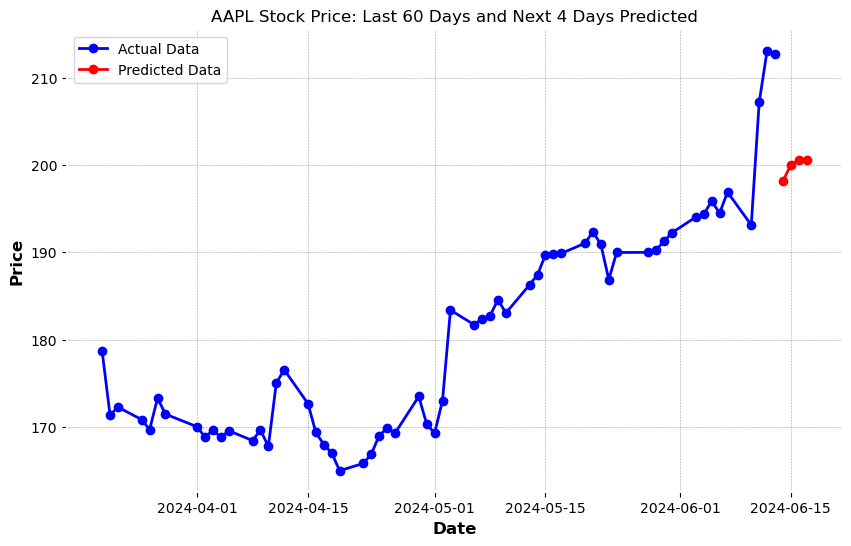

In [29]:
import pandas as pd
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Fetch the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='3mo', interval='1d') # Fetch 64 days to display last 60 days in the chart

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    next_prediction = model.predict(current_batch)
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("AAPL Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()